In [1]:
# IMPORTACIÓN DE LIBRERIAS NECESARIAS:

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Lectura y exploración inicial de datasets.
Para esta fase he creado una función para la lectura y exploración inicial de cada dataset: muestra dimensiones del dataset, información general, si existen nulos y duplicados y las principales estadísticas de cada variable.

In [2]:
# CREACIÓN DE UNA FUNCIÓN PARA LEER Y EXPLORAR CADA DATASET.

def leer_y_explorar_df(ruta_fichero):

    # Lectura del fichero
    try:
        df = pd.read_csv(ruta_fichero)
        print(f" Fichero {ruta_fichero} cargado correctamente:\n")
        print("\nPRIMERAS 5 FILAS DEL DATAFRAME")
        display(df.head(5))
        
    except FileNotFoundError:
        print(f" ERROR: No se encontró el fichero '{df}' en la ruta '{ruta_fichero}'")
        return None
    
    except Exception as e:
        print(f" ERROR inesperado al leer el fichero: {e}")
        return None

    # Dimensiones del dataset
    print(f" DIMENSIONES: {df.shape[0]} filas y {df.shape[1]} columnas\n")
    
    # Info general 
    print(" INFORMACIÓN GENERAL")
    df.info()
    
    # Sumatorio de valores nulos por columna
    print("\n VALORES NULOS POR COLUMNA")
    display(df.isnull().sum())
    
    # Sumatorio de filas duplicadas
    print("\n FILAS DUPLICADAS")
    print(f"Número de filas duplicadas: {df.duplicated().sum()}")

    # Principales estadísticas de las variables
    if df.select_dtypes(include='number').shape[1]:
        print("\nESTADÍSTICAS NUMÉRICAS:")
        display(df.describe().T)
    else:
        print("\n ESTADÍSTICAS NUMÉRICAS: No existen variables numéricas.")
    
    
    if df.select_dtypes(include='object').shape[1]:
        print("\nESTADÍSTICAS CATEGÓRICAS:")
        display(df.describe(include='object').T)
    else:
        print("\n ESTADÍSTICAS CATEGÓRICAS: No existen variables categóricas.")

    return df


In [3]:
# LECTURA Y EXPLORACIÓN DEL DATSET: Customer Flight Activity.csv (Análisis de vuelos de clientes)

df_vuelos = leer_y_explorar_df("files/Customer Flight Activity.csv")


 Fichero files/Customer Flight Activity.csv cargado correctamente:


PRIMERAS 5 FILAS DEL DATAFRAME


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


 DIMENSIONES: 405624 filas y 10 columnas

 INFORMACIÓN GENERAL
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB

 VALORES NULOS POR COLUMNA


Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64


 FILAS DUPLICADAS
Número de filas duplicadas: 1864

ESTADÍSTICAS NUMÉRICAS:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0



 ESTADÍSTICAS CATEGÓRICAS: No existen variables categóricas.


In [4]:
# LECTURA Y EXPLORACIÓN DE DATASET: Customer Loyalty History.csv(Historial de fidelidad del cliente)

df_clientes = leer_y_explorar_df("files/Customer Loyalty History.csv")


 Fichero files/Customer Loyalty History.csv cargado correctamente:


PRIMERAS 5 FILAS DEL DATAFRAME


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


 DIMENSIONES: 16737 filas y 16 columnas

 INFORMACIÓN GENERAL
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   floa

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64


 FILAS DUPLICADAS
Número de filas duplicadas: 0

ESTADÍSTICAS NUMÉRICAS:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00



ESTADÍSTICAS CATEGÓRICAS:


,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


# Gestión de duplicados en dataset df_vuelos: 

1-Comprobé el tamaño total del datset, el número de filas duplicadas y el procentaje que estas representaban sobre el total.

2-Inspecioné el contenido de las filas duplicadas para comprobar si eran duplicados exactos y entender qué información se repetía. Para ello, analicé cuántos valores únicos contenían estas filas, lo que me permitió confirmar que no aportaban información adicional.

Una vez verificado que se trataba de duplicados completos y que su porcentaje era bajo, procedí a eliminarlos conservando la primera aparción, para asegurar la calidad del dataset final antes de la unión.

In [5]:
# Comprobación de las filas totales del dataset, número de filas duplicadas y que porcentaje representan.

print(f" Total filas en df_vuelos = {df_vuelos.shape[0]}")

print(f"\n Filas duplicadas en df_vuelos = {df_vuelos.duplicated().sum()}")

porcentaje_duplicados = df_vuelos.duplicated().sum() / df_vuelos.shape[0] * 100
print(f"\nPorcentaje de filas duplicadas = {porcentaje_duplicados:.2f}%")



 Total filas en df_vuelos = 405624

 Filas duplicadas en df_vuelos = 1864

Porcentaje de filas duplicadas = 0.46%


In [6]:
# Comprobar el contenido de las filas duplicadas.

df_vuelos[df_vuelos.duplicated()]

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
42,101902,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
478,126100,2017,1,0,0,0,0,0.0,0,0
567,130331,2017,1,0,0,0,0,0.0,0,0
660,135421,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
404668,949628,2018,12,0,0,0,0,0.0,0,0
404884,960050,2018,12,0,0,0,0,0.0,0,0
405111,971370,2018,12,0,0,0,0,0.0,0,0
405410,988392,2018,12,0,0,0,0,0.0,0,0


In [7]:
# Comprobación del número de valores únicos que contienen las filas duplicadas

df_dup = df_vuelos[df_vuelos.duplicated(keep="first")]
df_dup.shape
df_dup.nunique()

Loyalty Number                 159
Year                             2
Month                           12
Flights Booked                   1
Flights with Companions          1
Total Flights                    1
Distance                         1
Points Accumulated               1
Points Redeemed                  1
Dollar Cost Points Redeemed      1
dtype: int64

In [8]:
# ELIMINAR DUPLICADOS DEL DATAFRAME df_vuelos

df_vuelos_sin_dupl = df_vuelos.drop_duplicates()

# Comprobación que se han eliminado correctamente.
print(f" Filas duplicadas en df_vuelos_sin_dupl:{df_vuelos_sin_dupl.duplicated().sum()}")
print(f" Número de filas de df_vuelos_sin_dupl: {df_vuelos_sin_dupl.shape[0]}")

 Filas duplicadas en df_vuelos_sin_dupl:0
 Número de filas de df_vuelos_sin_dupl: 403760


#  Unión de ficheros:
-Unión mediante un left merge utilizando la columna Loyalty Number, tomando como base el dataset de vuelos. Esta decisión se debe a que el objetivo del análisis es estudiar la actividad de vuelo de los clientes, por lo que es importante conservar todos los registros de vuelos. De esta forma, se añade la información del perfil del cliente sin perder ninguna observación relevante para el análisis.
-Posteriormente he realizado una exploración del dataset resultante para verificar que no se pierde información tras la unión.

In [9]:
# UNIÓN MEDIANTE LEFT MERGE DE LOS DOS FICHEROS

df_merge = df_vuelos_sin_dupl.merge(df_clientes, on= "Loyalty Number", how="left")

In [10]:
# EXPLORACIÓN DEL DATASET RESULTANTE PARA VERIFICAR QUE LA UNIÓN ES CORRECTA.

# Dimensiones: 
# Número de filas debe ser igual en ambos datasets
print(f"DIMENSIONES:")
print(f"{df_vuelos_sin_dupl.shape[0]} filas en el dataset principal vuelos")
print(f"{df_merge.shape[0]} filas tras el merge")

# Número de columnas.
print(f"{df_vuelos.shape[1]} columnas en el dataset principal vuelos.")
print(f"{df_clientes.shape[1]} columnas en el dataset clientes")
print(f"{df_merge.shape[1]} columnas tras el merge")

# Información general: tipos de datos, nombres de columnas.
print(f"\n INFORMACIÓN GENERAL:")
df_merge.info()

# Nulos por columnas.
print("\n NÚMERO DE NULOS:")
print(f"{df_merge.isnull().sum()}")
      
# Filas duplicadas.
print(f"\n NÚMERO DE FILAS DUPLICADAS: {df_merge.duplicated().sum()}")

# Identificadores de clientes
print(f"\n{df_vuelos_sin_dupl["Loyalty Number"].nunique()} Loyalty Number en dataset principal vuelos")
print(f"{df_clientes["Loyalty Number"].nunique()} Loyalty Number en dataset clientes")
print(f"{df_merge["Loyalty Number"].nunique()} Loyalty Number en dataset tras del merge")

## PENSAR SI QUITO ESTA PARTE PORQUE NO LA SE EXPLICAR BIEN Estadistica para ver que el merge no distorsiona datos
print(f"\nPromedio de vuelos reservados en dataset vuelos: {df_vuelos_sin_dupl["Flights Booked"].mean():.2f}%")
print(f"Promedio de vuelos reservados tras el merge {df_merge["Flights Booked"].mean():.2f}%") 

DIMENSIONES:
403760 filas en el dataset principal vuelos
403760 filas tras el merge
10 columnas en el dataset principal vuelos.
16 columnas en el dataset clientes
25 columnas tras el merge

 INFORMACIÓN GENERAL:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Year                         403760 non-null  int64  
 2   Month                        403760 non-null  int64  
 3   Flights Booked               403760 non-null  int64  
 4   Flights with Companions      403760 non-null  int64  
 5   Total Flights                403760 non-null  int64  
 6   Distance                     403760 non-null  int64  
 7   Points Accumulated           403760 non-null  float64
 8   Points Redeemed              403760 non-null  int64  
 9   Dollar Cost Points Rede

# Limpieza de datos: 

1-Homogeneicé los nombres de las columnas, convirtiéndolos a minúsculas y sustituyendo los espacios por guiones bajos. Esto permite trabajar de forma más cómoda y evita errores a la hora de hacer  el código.

2-Eliminé aquellas columnas que no eran relevantes para los objetivos del análisis,no aportaban información útil para las preguntas planteadas.

Finalmente, comprobé la estructura del dataset resultante mediante info() y head() para asegurar que las columnas restantes eran coherentes y que la limpieza se había aplicado correctamente.

In [11]:
# HOMOGENEIZAR NOMBRES DE LAS COLUMNAS: sustituir espacios por "_" y nombre en minúscula.

df_merge.columns = df_merge.columns.str.lower().str.replace(" ", "_")

# Compruebo resultado
df_merge.columns

Index(['loyalty_number', 'year', 'month', 'flights_booked',
       'flights_with_companions', 'total_flights', 'distance',
       'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed',
       'country', 'province', 'city', 'postal_code', 'gender', 'education',
       'salary', 'marital_status', 'loyalty_card', 'clv', 'enrollment_type',
       'enrollment_year', 'enrollment_month', 'cancellation_year',
       'cancellation_month'],
      dtype='object')

In [12]:
#ELIMINAR COLUMNAS NO RELEVANTES PARA EL ANÁLISIS

eliminar =["flights_with_companions","points_redeemed","dollar_cost_points_redeemed","city","postal_code","clv","enrollment_year",
           "enrollment_month","cancellation_year","cancellation_month"]
df_final = df_merge.drop(eliminar,axis=1)

In [13]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   loyalty_number      403760 non-null  int64  
 1   year                403760 non-null  int64  
 2   month               403760 non-null  int64  
 3   flights_booked      403760 non-null  int64  
 4   total_flights       403760 non-null  int64  
 5   distance            403760 non-null  int64  
 6   points_accumulated  403760 non-null  float64
 7   country             403760 non-null  object 
 8   province            403760 non-null  object 
 9   gender              403760 non-null  object 
 10  education           403760 non-null  object 
 11  salary              301500 non-null  float64
 12  marital_status      403760 non-null  object 
 13  loyalty_card        403760 non-null  object 
 14  enrollment_type     403760 non-null  object 
dtypes: float64(2), int64(6), object(7)

In [14]:
df_final.head()

,loyalty_number,year,month,flights_booked,total_flights,distance,points_accumulated,country,province,gender,education,salary,marital_status,loyalty_card,enrollment_type
0,100018,2017,1,3,3,1521,152.0,Canada,Alberta,Female,Bachelor,92552.0,Married,Aurora,Standard
1,100102,2017,1,10,14,2030,203.0,Canada,Ontario,Male,College,NaN,Single,Nova,Standard
2,100140,2017,1,6,6,1200,120.0,Canada,British Columbia,Female,College,NaN,Divorced,Nova,Standard
3,100214,2017,1,0,0,0,0.0,Canada,British Columbia,Male,Bachelor,63253.0,Married,Star,Standard
4,100272,2017,1,0,0,0,0.0,Canada,Ontario,Female,Bachelor,91163.0,Divorced,Star,Standard


# Gestión de nulos

La única columna con valores nulos es "salary", una columna numérica relevante para el análisis.

 Para tomar una decision respecto a esos valores:

1-Compruebo cantidad de valores nulos y el porcentaje que representan.

2-Compruebo si existen valores atípicos en la columna.

3-Análisis descriptivo previo,antes de tratar los valores nulos, calculo las estadísticas descriptivas básicas (media, mediana, mínimo, máximo, etc.) para entender la distribución del salario y detectar posibles valores atípicos o incoherentes.

4-Detecto valores negativos o con valor cero, calculo el porcentaje que representan en la columna y reviso algunos ejemplos.

5-Visualización de la distribución de la columna antes de la imputación, para ver visualmente esos valores negativos.

6-Imputación de valores nulos: El porcentaje de nulos es alto, un 25,33% por lo que decido imputarlos a través del Iterative Imputer por el gran volumen de datos y su precisión en los cálculos.

7- Transformación de valores negativos a valores absolutos: Tras comprobar que suponen un mínimo porcentaje decido transformarlos a absolutos porque en negativo no tienen sentido para el análisis.

8- Realizo algunas observaciones para comprobar que ya no existen nulos y que las estadísticas no tienen grandes cambios.


In [15]:
# COMPROBACIÓN DE NULOS y %

# Total de nulos en la columna
print(f"Total de valores nulos: {df_final['salary'].isnull().sum()}")

# Calcular el porcentaje que representan
porc_nulos = df_final["salary"].isnull().sum() / df_final.shape[0] * 100
print(f"Estos nulos representan el {porc_nulos:.2f}% del total de filas.")

# Estadistica descriptiva
print("\nEstadísticas descriptivas:")
print(df_final['salary'].describe().T.round(2))


Total de valores nulos: 102260
Estos nulos representan el 25.33% del total de filas.

Estadísticas descriptivas:
count    301500.00
mean      79258.58
std       34983.93
min      -58486.00
25%       59262.00
50%       73479.00
75%       88606.00
max      407228.00
Name: salary, dtype: float64


In [16]:
# COMPROBACIÓN DE VALORES MÍNIMOS

# Comprobar si hay valores igual a 0 y negativos
print(f"Número de valores negativos registrados:{(df_final["salary"] <= 0).sum()}")

# Porcentaje que representan del total de la columna
print(f"Porcentaje que representan los negativos: {(df_final['salary'] <= 0).mean() * 100:.2f}%")

# Ver algunos ejemplos de valores negativos
df_final[df_final["salary"]<=0]

Número de valores negativos registrados:480
Porcentaje que representan los negativos: 0.12%


,loyalty_number,year,month,flights_booked,total_flights,distance,points_accumulated,country,province,gender,education,salary,marital_status,loyalty_card,enrollment_type
291,115505,2017,1,0,0,0,0.0,Canada,Newfoundland,Male,Bachelor,-10605.0,Married,Nova,2018 Promotion
956,152016,2017,1,0,0,0,0.0,Canada,Ontario,Female,Bachelor,-58486.0,Married,Aurora,2018 Promotion
1716,194065,2017,1,0,0,0,0.0,Canada,Ontario,Female,Bachelor,-31911.0,Married,Nova,2018 Promotion
2081,212128,2017,1,3,3,1959,195.0,Canada,Ontario,Male,Bachelor,-49001.0,Married,Nova,2018 Promotion
2433,232755,2017,1,0,0,0,0.0,Canada,British Columbia,Female,Bachelor,-46683.0,Single,Nova,2018 Promotion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398813,734647,2018,12,15,15,1440,144.0,Canada,Saskatchewan,Male,Bachelor,-46303.0,Married,Nova,2018 Promotion
399884,790475,2018,12,7,8,1056,105.0,Canada,Ontario,Female,Bachelor,-34079.0,Married,Nova,2018 Promotion
402017,906428,2018,12,13,13,2912,291.0,Canada,Yukon,Male,Bachelor,-57297.0,Married,Star,2018 Promotion
402459,430398,2018,12,5,10,660,66.0,Canada,Newfoundland,Male,Bachelor,-17534.0,Married,Nova,2018 Promotion


In [17]:
# IMPUTACIÓN DE VALORES NULOS CON ITERATIVE IMPUTER

imputer = IterativeImputer(max_iter = 20, random_state= 42)
df_final['salary'] = imputer.fit_transform(df_final[['salary']])
# 1.max_iter = 10 Número máximo de iteraciones que hará el algoritmo para mejorar las estimaciones
#random_state = 42 Semilla aleatoria para reproducibilidad, Usa siempre la misma semilla para obtener resultados consistentes"

In [18]:
# Pasar valores negativos a valores absolutos

df_final['salary'] = df_final['salary'].abs()

In [19]:
# Comprobación tras la imputación y la transformación a valores absolutos

# Total de nulos en la columna
print(f"Total de valores nulos: {df_final['salary'].isnull().sum()}")

# Calcular el porcentaje que representan
porc_nulos = df_final["salary"].isnull().sum() / df_final.shape[0] * 100
print(f"Estos nulos representan el {porc_nulos:.2f}% del total de filas.")

# Estadistica descriptiva
print("\nEstadísticas descriptivas:")
print(df_final['salary'].describe().T.round(2))


Total de valores nulos: 0
Estos nulos representan el 0.00% del total de filas.

Estadísticas descriptivas:
count    403760.00
mean      79343.07
std       30008.38
min        9081.00
25%       63901.00
50%       79258.58
75%       82940.00
max      407228.00
Name: salary, dtype: float64


# Estadística descriptiva

Análisis estadístico de las principales variables numéricas: Salary (salario), Flights Booked (vuelos reservados), Points Accumulated (puntos acumulados), Distance (distancia).
-Creo función para calcular principales medidas de concentración y dispersión acompañada de un pequeño gráfico.

In [ ]:
# FUNCIÓN PARA CALCULAR Y VISUALIZAR LAS PRINCIPALES ESTADÍSTICAS

def estadisticas_descriptivas(df, columnas):
    for col in columnas:
        # Medidas de centralización (donde está el valor más típico)
        media = df[col].mean().round(2)
        mediana = df[col].median().round(2)
        moda = (df[col].mode()[0]).round(2)

        # Medidas de dispersión # (cómo de agrupado están los datos)Variabilidad
        # cuanto se separan los datos respecto a un valor central
        desviacion_estandar = df[col].std().round(2)
        rango = (df[col].max() - df[col].min()).round(2)
        minimo = df[col].min().round(2)
        maximo = df[col].max().round(2)
        coef_variacion = (desviacion_estandar / media * 100).round(2)
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)

        # Calculamos los percentiles 25 y 75 
        percentile_25_75 = np.percentile(df[col].dropna(), [25, 75])


        print(f"\nESTADÍSTICAS PARA: '{col}':")
        print("Medidas de centralización:")
        print(f"  Media: {media}")
        print(f"  Mediana: {mediana}")
        print(f"  Moda: {moda}")
        print(" \n Medidas de dispersión:")
        print(f"  Desviación estándar: {desviacion_estandar}")
        print(f"  Rango: {rango}")
        print(f"  Mínimo: {minimo}")
        print(f"  Máximo: {maximo}")
        print(f"  Coeficiente de variación (%): {coef_variacion}")
        print(f"  Rango intercuartílico (IQR): {IQR}")
        print("  \n Medidas de posición relativa: Percentiles")
        print(f'  El percentil 25 de {col} es: {percentile_25_75[0]}') # el 25% de los datos es igual o menor que ese valor
        print(f'  El percentil 75 de {col}: {percentile_25_75[1]}')
        # Gráfico
        plt.figure(figsize=(12, 3)) # tamaño del gráfico
        plt.hist(df[col], bins=30, edgecolor='black')

       # Línea de la media (azul)
        plt.axvline(media, color='blue', linestyle='--', linewidth=2, label='Media')

       # Línea de la mediana (rojo)
        plt.axvline(mediana, color='red', linestyle='--', linewidth=2, label='Mediana')

      # Títulos y etiquetas
        plt.title(f"Distribución de {col} con media y mediana")
        plt.xlabel(f" {col}")
        plt.ylabel('Frecuencia')

     # Leyenda
        plt.legend()
        plt.show()


ESTADÍSTICAS PARA: 'salary':
Medidas de centralización:
  Media: 79343.07
  Mediana: 79258.58
  Moda: 79258.58
 
 Medidas de dispersión:
  Desviación estándar: 30008.38
  Rango: 398147.0
  Mínimo: 9081.0
  Máximo: 407228.0
  Coeficiente de variación (%): 37.82
  Rango intercuartílico (IQR): 19039.0
  
 Medidas de posición relativa: Percentiles
  El percentil 25 de salary es: 63901.0
  El percentil 75 de salary: 82940.0


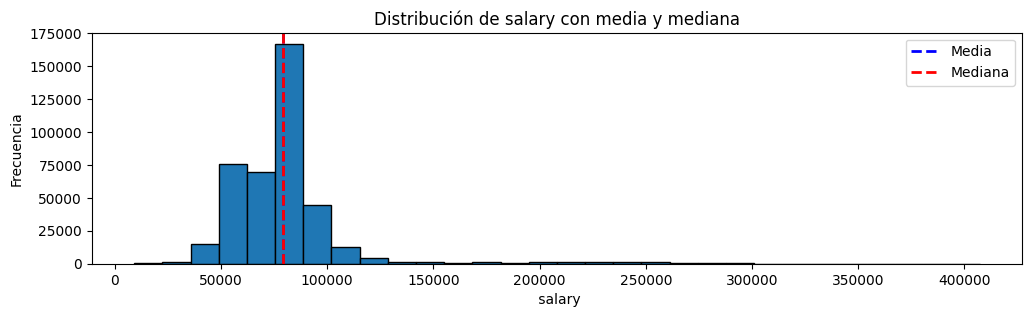


ESTADÍSTICAS PARA: 'distance':
Medidas de centralización:
  Media: 1214.46
  Mediana: 525.0
  Moda: 0
 
 Medidas de dispersión:
  Desviación estándar: 1434.1
  Rango: 6293
  Mínimo: 0
  Máximo: 6293
  Coeficiente de variación (%): 118.09
  Rango intercuartílico (IQR): 2342.0
  
 Medidas de posición relativa: Percentiles
  El percentil 25 de distance es: 0.0
  El percentil 75 de distance: 2342.0


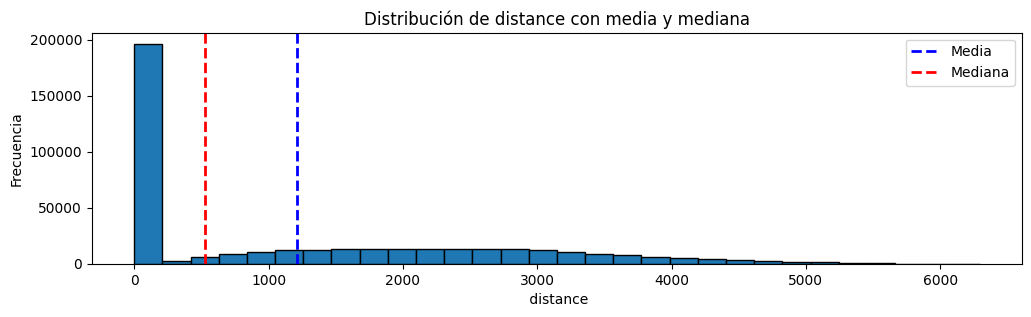


ESTADÍSTICAS PARA: 'flights_booked':
Medidas de centralización:
  Media: 4.13
  Mediana: 1.0
  Moda: 0
 
 Medidas de dispersión:
  Desviación estándar: 5.23
  Rango: 21
  Mínimo: 0
  Máximo: 21
  Coeficiente de variación (%): 126.63
  Rango intercuartílico (IQR): 8.0
  
 Medidas de posición relativa: Percentiles
  El percentil 25 de flights_booked es: 0.0
  El percentil 75 de flights_booked: 8.0


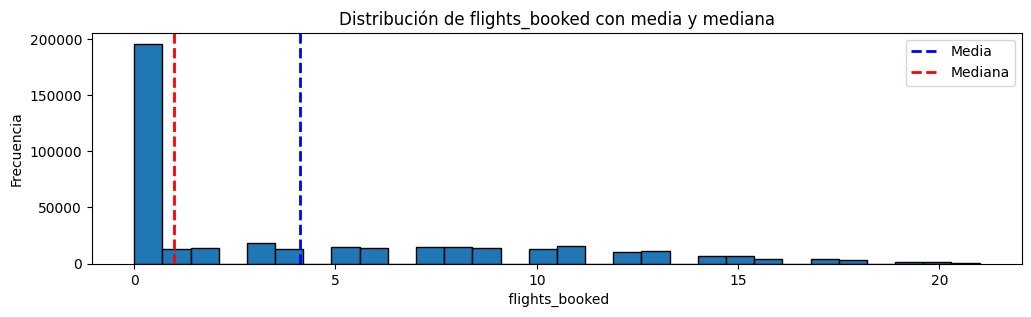


ESTADÍSTICAS PARA: 'points_accumulated':
Medidas de centralización:
  Media: 124.26
  Mediana: 53.0
  Moda: 0.0
 
 Medidas de dispersión:
  Desviación estándar: 146.7
  Rango: 676.5
  Mínimo: 0.0
  Máximo: 676.5
  Coeficiente de variación (%): 118.06
  Rango intercuartílico (IQR): 240.0
  
 Medidas de posición relativa: Percentiles
  El percentil 25 de points_accumulated es: 0.0
  El percentil 75 de points_accumulated: 240.0


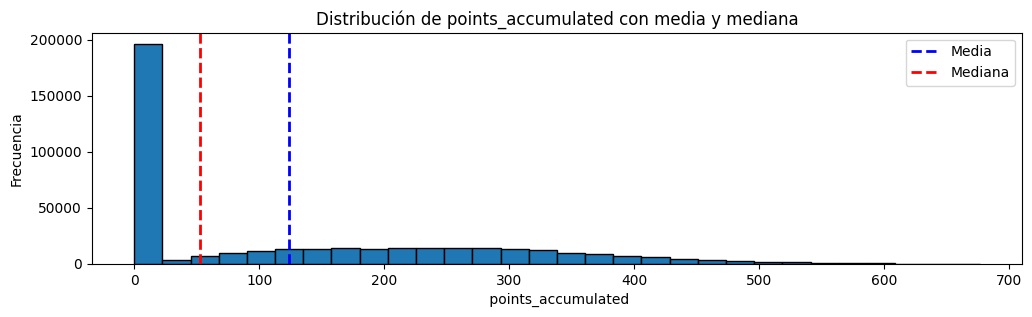

In [21]:
columnas_num = ['salary', 'distance','flights_booked','points_accumulated']
estadisticas_descriptivas(df_final,columnas_num)

INTERPRETACIÓN PRINCIPALES MEDIDAS DE CENTRALIZACIÓN Y DISPERSIÓN:
En las variables distancia, vuelos reservados y puntos acumulados la media es mayor que la mediana, la desviación es alta y la gráfica nos muestra una distribución asimétrica formando una cola hacia la derecha.

Todo esto nos indica que la mayoría de los datos son bajos pero existen algunos valores muy altos que hacen que aumente la media, los datos son muy variables entre sí lo que da a entender que no todos los clientes siguen el mismo patrón.

En el salario la media y mediana son muy similares y la distribución es simétrica, los datos están más concentrados pero también existen algunos valores muy extremos que aumentan la media.


In [22]:
# FUNCIÓN PARA DETECTAR VALORES ATÍPICOS (OUTLIERS)

def detectar_outliers (df, columnas):
    for col in columnas:
        # Calcular quartil 1, quartil 3 y rango intercuartilico
        
        Q1 = df[col].quantile(0.25) # 25% de los valores es inferior al Q1
        Q3 = df[col].quantile(0.75) # 75% de los valores es inferior al Q3
        IQR = Q3 - Q1
        
        # Límite inferior y superior
        LI = Q1 - 1.5 * IQR # valores por debajo de este límite son atípicos
        LS = Q3 + 1.5 * IQR # valores por encima de este límite son atípicos

        # Outliers
        outliers = df[(df[col] < LI) | (df[col] > LS)]

        print(f"\nCálculo de valores atípicos para la variable {col}")
        print(f"Q1: {Q1}")
        print(f"Q3: {Q3}")
        print(f"Rango Intercuartílico: {IQR}")
        print(f"Límite Inferior: {LI}")
        print(f"Límite Superior: {LS}")

        print(f"Valor mínimo en {col}: {df[col].min()}") # valore mínimo registrado en esa variable
        print(f"Valor máximo en {col}: {df[col].max()}") # valor máximo registrado en esa variable
        print(f'Número de outliers detectados en la variable:{col} {outliers.shape[0]}') 
        
       # Gráfico
       # Comprobar mediante gráfica valores atípicos en la columna "salary"
        plt.figure(figsize=(20, 5))
        sns.boxplot( x = df_final[col])
        plt.title (f"Distribución de {col}")
        plt.show()


Cálculo de valores atípicos para la variable salary
Q1: 63901.0
Q3: 82940.0
Rango Intercuartílico: 19039.0
Límite Inferior: 35342.5
Límite Superior: 111498.5
Valor mínimo en salary: 9081.0
Valor máximo en salary: 407228.0
Número de outliers detectados en la variable:salary 20876


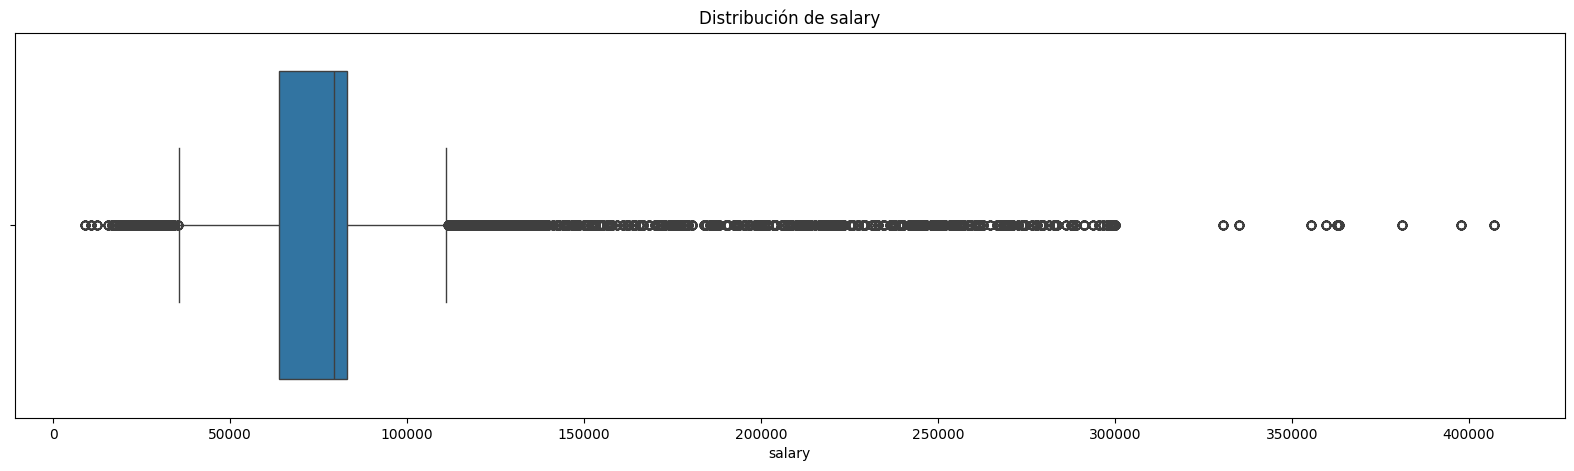


Cálculo de valores atípicos para la variable distance
Q1: 0.0
Q3: 2342.0
Rango Intercuartílico: 2342.0
Límite Inferior: -3513.0
Límite Superior: 5855.0
Valor mínimo en distance: 0
Valor máximo en distance: 6293
Número de outliers detectados en la variable:distance 125


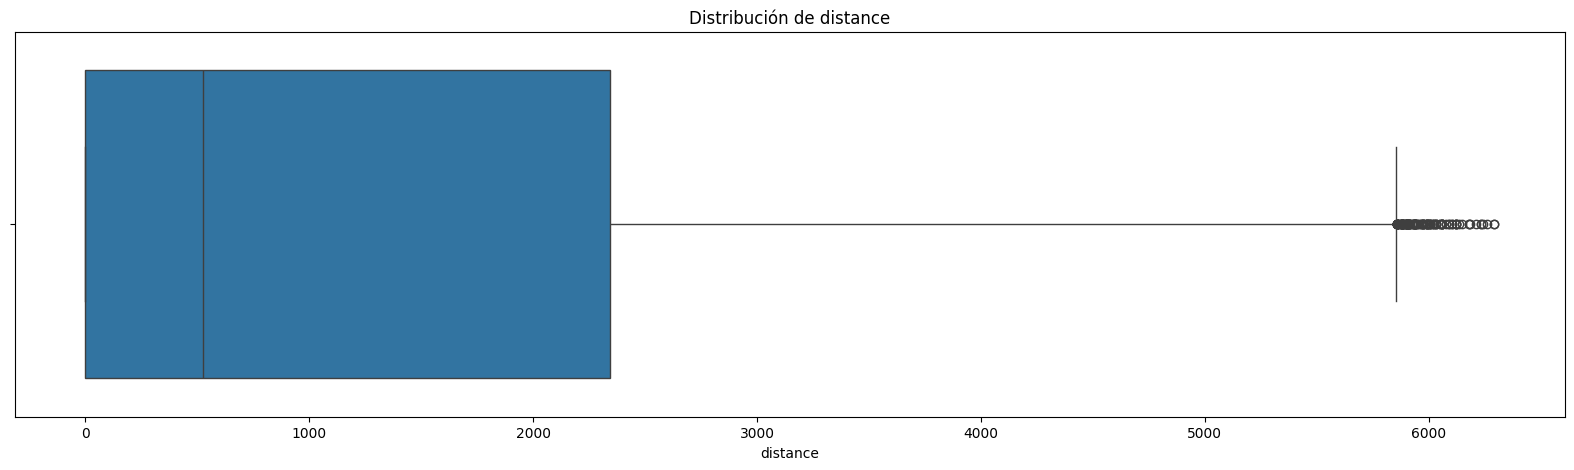


Cálculo de valores atípicos para la variable flights_booked
Q1: 0.0
Q3: 8.0
Rango Intercuartílico: 8.0
Límite Inferior: -12.0
Límite Superior: 20.0
Valor mínimo en flights_booked: 0
Valor máximo en flights_booked: 21
Número de outliers detectados en la variable:flights_booked 528


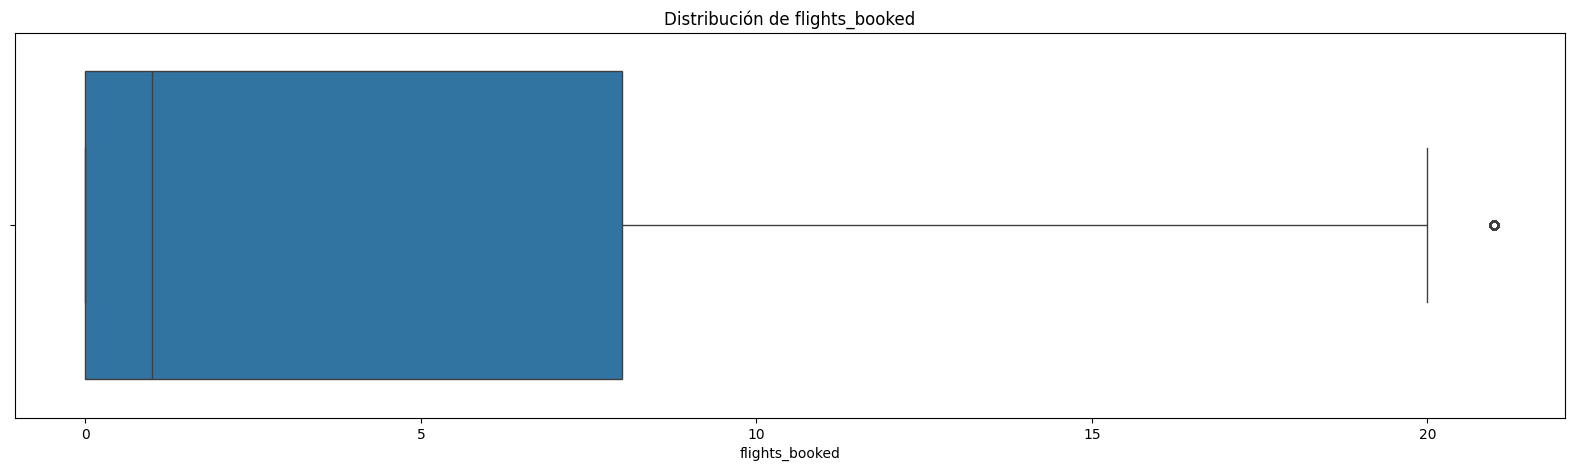


Cálculo de valores atípicos para la variable points_accumulated
Q1: 0.0
Q3: 240.0
Rango Intercuartílico: 240.0
Límite Inferior: -360.0
Límite Superior: 600.0
Valor mínimo en points_accumulated: 0.0
Valor máximo en points_accumulated: 676.5
Número de outliers detectados en la variable:points_accumulated 112


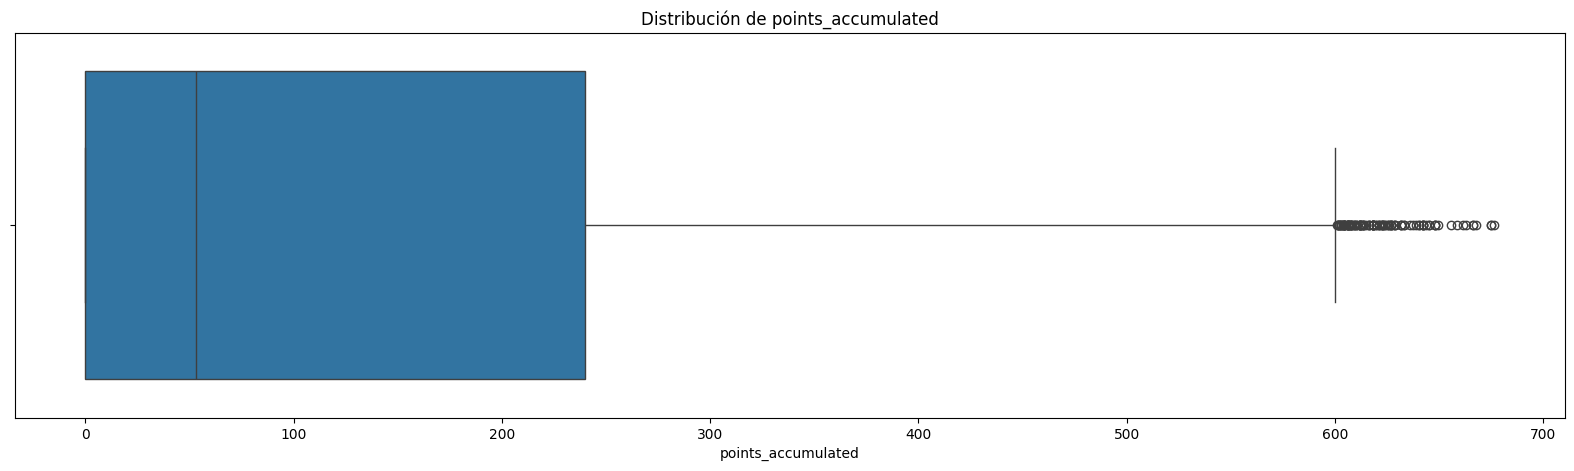

In [23]:

detectar_outliers(df_final,columnas_num)

Interpretación de valores atípicos: Al comprobar los límites y observar los gráficos, ambos nos muestran que los valores atípicos están por encima de los límites superiores, excepto en salario que también hay algunos valores atípicos por debajo del límite inferior.


# Análisis de correlación entre variables numéricas:
Mide fuerza y dirección de la relación entre dos variables, para ver si están relacionadas entre sí.

In [24]:
correlation_matrix = df_final.select_dtypes(include="number").corr("spearman")

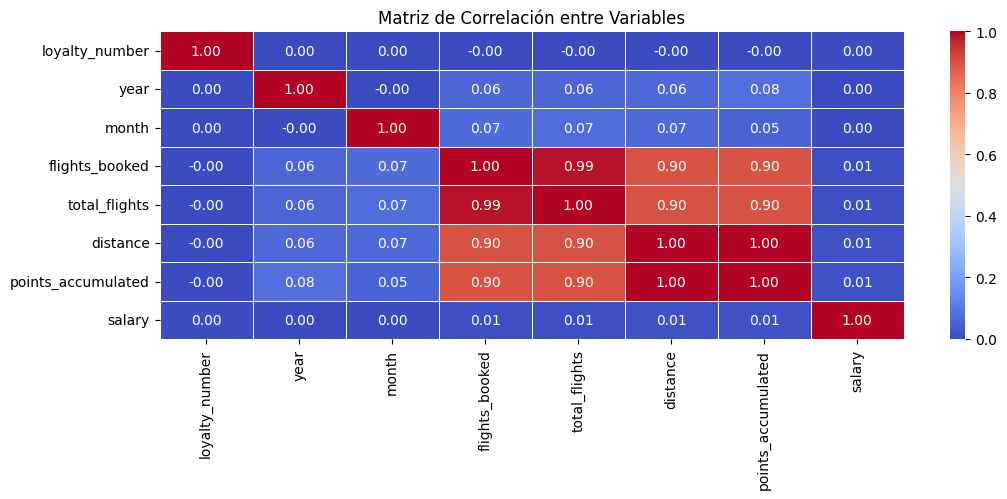

In [25]:
correlation_matrix
# Visualiza la matriz de correlación utilizando seaborn
plt.figure(figsize=(12, 4))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Añade título
plt.title('Matriz de Correlación entre Variables')

# Muestra el gráfico

plt.show()

Interpretación análisis de correlación: Existe una relación positiva entre los vuelos reservados y el total de vuelos y entre la distancia y los puntos acumulados, tiene sentido ya que mayor distancia más puntos acumula el cliente y mayor número de vuelos reservados más vuelos realiza el cliente.

Análisis de variables categóricas: género, educación,estado civil

In [26]:
# FUNCIÓN PARA CALCULAR DISTRIBUCIÓN DE FRECUENCIAS EN LAS VARIABLES CATEGÓRICAS

def distrib_cat (df,columnas):
    for col in columnas:
    
        # calculamos la tabla de frecuencia absoluta
        frecuencia_absoluta = df_merge[col].value_counts()

        # calculamos la tabla de frecuencia relativa incluyendo el parámetro "normalize" para que nos lo convierta en tanto por 1. 
        frecuencia_relativa = (df_merge[col].value_counts(normalize=True) * 100).round(2)

        # creamos un DataFrame para mostrar ambas tablas
        tabla_frecuencias = pd.DataFrame({
        'Opción': frecuencia_absoluta.index,
        'Frecuencia Absoluta': frecuencia_absoluta.values,
        'Frecuencia Relativa (%)': frecuencia_relativa.values
         })
        # vemos la tabla de frecuencias
        print(f"\nDistribución de {col}")
        display(tabla_frecuencias)

In [27]:

columnas_cat = ['gender','education', 'marital_status','province']
distrib_cat(df_final,columnas_cat)


Distribución de gender


,Opción,Frecuencia Absoluta,Frecuencia Relativa (%)
0,Female,202757,50.22
1,Male,201003,49.78



Distribución de education


,Opción,Frecuencia Absoluta,Frecuencia Relativa (%)
0,Bachelor,252567,62.55
1,College,102260,25.33
2,High School or Below,18915,4.68
3,Doctor,17731,4.39
4,Master,12287,3.04



Distribución de marital_status


,Opción,Frecuencia Absoluta,Frecuencia Relativa (%)
0,Married,234845,58.16
1,Single,108153,26.79
2,Divorced,60762,15.05



Distribución de province


,Opción,Frecuencia Absoluta,Frecuencia Relativa (%)
0,Ontario,130258,32.26
1,British Columbia,106442,26.36
2,Quebec,79573,19.71
3,Alberta,23360,5.79
4,Manitoba,15900,3.94
5,New Brunswick,15352,3.80
6,Nova Scotia,12507,3.10
7,Saskatchewan,9861,2.44
8,Newfoundland,6244,1.55
9,Yukon,2679,0.66


Interpretación: El estudio de frecuencias indica que no hay diferencias entre el número de clientes hombres o mujeres. Un poco más de la mitad de los clientes tiene estudios de bachillerato, la mitad están casados y un alto número de clientes son de las provincias de Ontario y British COlumbia.

# Visualización

In [28]:
# ¿ CÓMO SE DISTRIBUYE LA CANTIDAD DE VUELOS RESERVADOS POR MES DURANTE EL AÑO  
df_vuelos_reserv = df_final.groupby(['year','month'])['flights_booked'].sum().reset_index()
df_vuelos_reserv


,year,month,flights_booked
0,2017,1,47766
1,2017,2,47691
2,2017,3,64271
3,2017,4,55720
4,2017,5,65279
5,2017,6,80493
6,2017,7,89288
7,2017,8,78692
8,2017,9,63304
9,2017,10,60351


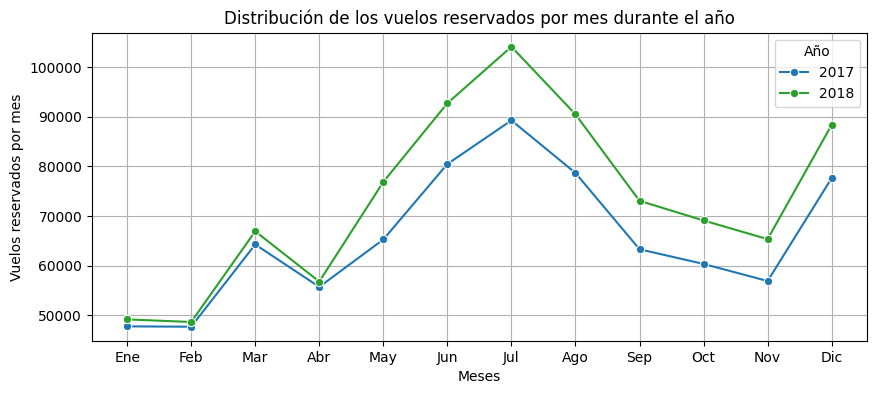

In [29]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df_vuelos_reserv, x='month', y='flights_booked', hue='year', marker='o',palette=['tab:blue', 'tab:green'])
plt.title('Distribución de los vuelos reservados por mes durante el año')
plt.xlabel('Meses')
plt.ylabel('Vuelos reservados por mes')
plt.xticks((range(1, 13)),['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic'])
plt.legend(title='Año')
plt.grid()
plt.show()   


Interpretación: La cantidad de vuelos en el 2018 es un poco mayor que en el año anterior, en la gráfica también se observa que los meses con más vuelos coinciden con los periodos de vacaciones.

Text(0, 0.5, 'Puntos acumulados')

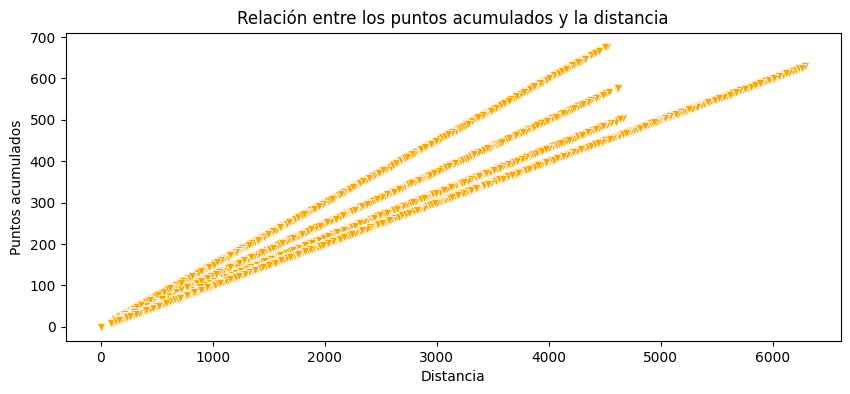

In [30]:
# ¿ EXISTE UNA RELACIÓN ENTRE LA DISTANCIA DE LOS VUELOS Y LOS PUNTOS ACUMULADOS POR LOS CLIENTES?
plt.figure(figsize=(10,4))
sns.scatterplot(x = "distance", y='points_accumulated', data=df_final, marker= "v",color = 'orange')
plt.title ('Relación entre los puntos acumulados y la distancia')
plt.xlabel('Distancia')
plt.ylabel('Puntos acumulados')

Interpretación: Claramente existe una relación positiva, al aumentar la distancia también aumentan los puntos acumulados.

Text(0, 0.5, 'Número de clientes')

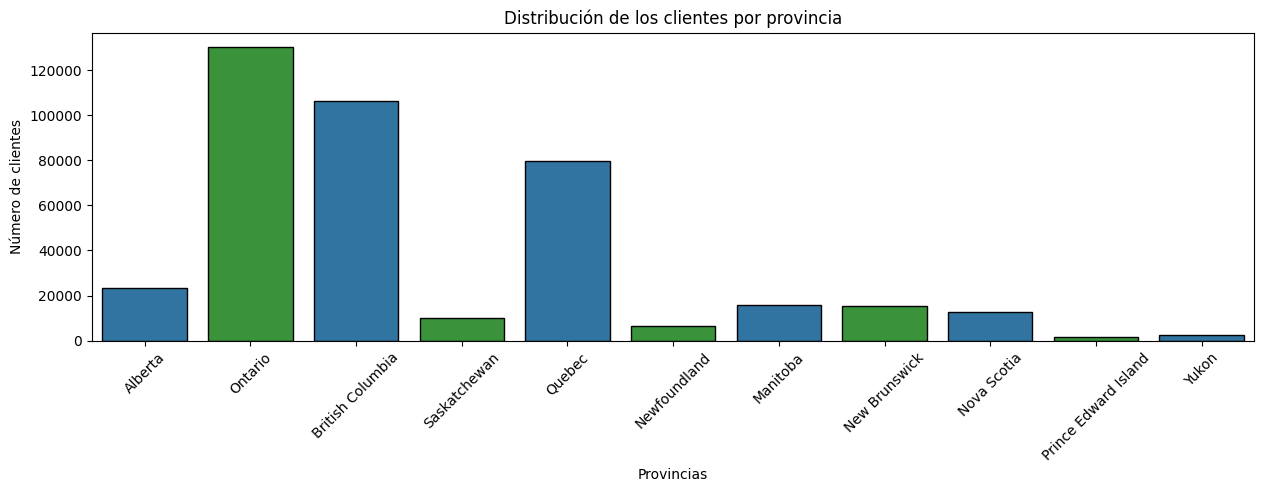

In [31]:
# ¿ CUÁL ES LA DISTRIBUCIÓN DE LOS CLIENTES POR PROVINCIA O ESTADO?
plt.figure(figsize=(15,4))
sns.countplot( x= 'province', data = df_final, palette=['tab:blue', 'tab:green'],edgecolor='black')
plt.xticks(rotation=45)
plt.title('Distribución de los clientes por provincia')
plt.xlabel('Provincias')
plt.ylabel('Número de clientes')



Interpretación: La mayoría de los clientes son de Ontario, British Columbia y Quebec.

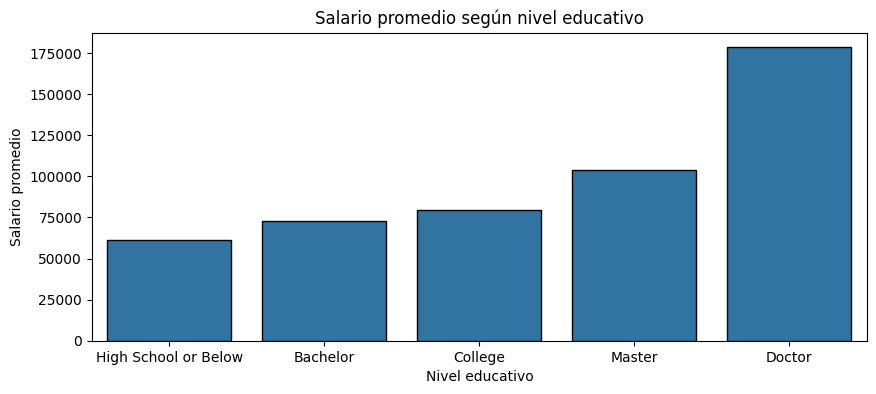

In [32]:
# ¿CÓMO SE COMPARA EL SALARIO PROMEDIO ENTRE LOS DIFERENTES NIVELES EDUACTIVOS DE LOS CLIENTES?

orden = ( df_final.groupby('education')['salary'].mean().sort_values().index)

plt.figure(figsize=(10,4))

sns.barplot(x='education', y='salary',data=df_final, order=orden,ci=None, edgecolor='black')

plt.title('Salario promedio según nivel educativo')
plt.xlabel('Nivel educativo')
plt.ylabel('Salario promedio')


plt.show()


Interpretación: Claramente se refleja que a mayor nivel de estudios mayor salario promedio.

In [33]:
# ¿ CUÁL ES LA PROPORCIÓN DE CLIENTES CON DIFERENTES TIPOS DE TARJETAS DE FIDELIDAD?
df_tarj_fid = df_final['loyalty_card'].value_counts().reset_index()
df_tarj_fid

,loyalty_card,count
0,Star,183745
1,Nova,136883
2,Aurora,83132


([<matplotlib.patches.Wedge at 0x1e2b85ff230>,
 [Text(0.15470147217790983, 1.0890672405806667, 'Star'),
  Text(-0.7797938894916361, -0.7758359942097984, 'Nova'),
  Text(0.8777936960623038, -0.6629315403216834, 'Aurora')],
 [Text(0.0843826211879508, 0.5940366766803635, '45.5%'),
  Text(-0.42534212154089235, -0.4231832695689809, '33.9%'),
  Text(0.47879656148852934, -0.3615990219936455, '20.6%')])

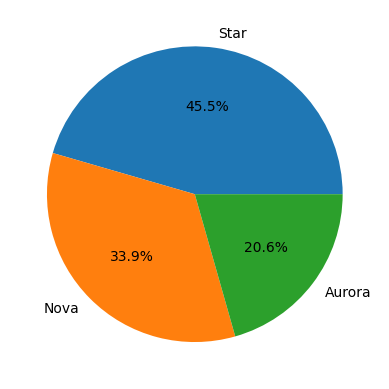

In [34]:
plt.pie ('count', labels = 'loyalty_card',data = df_tarj_fid, autopct = '%1.1f%%',)

In [35]:
# ¿ CÓMO SE DISTRIBUYEN LOS CLIENTES SEGÚN SU ESTADO CIVIL Y GÉNERO?

tabla = (pd.crosstab(df_final['marital_status'], df_final['gender'], normalize=True) * 100).round(2)
tabla

gender,Female,Male
marital_status,,
Divorced,7.59,7.46
Married,29.07,29.10
Single,13.56,13.22


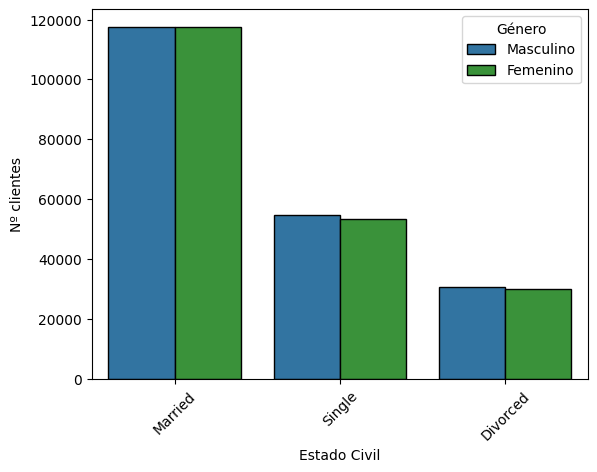

In [36]:
# Gráfico para observar resultados
sns.countplot(x='marital_status', data=df_final, hue='gender', palette=['tab:blue', 'tab:green'],edgecolor='black')

plt.xticks(rotation=45)
plt.xlabel("Estado Civil")
plt.ylabel("Nº clientes")
plt.legend(title='Género', labels=['Masculino', 'Femenino'])

plt.show()


Interpretación: No hay diferencias significativas entre géneros y estado civil, un poco más de la mitad de los clientes están casados.

# Diferencias en número de reservas de vuelos por nivel educativo

In [37]:
# Agrupar los datos por nivel educativo para calcular las principales estadisticas:
df_education = (df_final.groupby('education')['flights_booked'].describe()).round(2)
df_education

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
Bachelor,252567.0,4.11,5.22,0.0,0.0,1.0,8.0,21.0
College,102260.0,4.17,5.25,0.0,0.0,1.0,8.0,21.0
Doctor,17731.0,4.18,5.26,0.0,0.0,1.0,8.0,21.0
High School or Below,18915.0,4.18,5.24,0.0,0.0,1.0,8.0,21.0
Master,12287.0,4.20,5.21,0.0,0.0,1.0,8.0,21.0


Interpretación: El promedio de vuelos reservados en los distintos niveles educativos es similar, pero el número de clientes que pertenecen a da nivele educativos de bachelor y college es muy superior al de los demás colectivos, esto nos puede mostrar que la frecuencia con la que estos últimos hacen reservas de vuelos es mayor.

## CONCLUSIONES:

Tras estudiar 403760 registros de vuelos de 16737 clientes los hallazgos más relevantes que nos cuentan los datos:

* **Aumento del número de vuelos** en 2018 con respecto al año anterior, 2017.

* **Ubicación de los clientes:** Existe una altísima concentración de clientes en la provincia de **Ontario**

* **Perfil del cliente:** el 62% de clientes está casado, hay **equidad de género** 50,22% de mujeres y 49,78% de hombres, el 62,55% de los clientes tiene **nivel educativo Bachelor**. En cuanto al nivel salarial de los clientes los datos nos muestran que la mayoría tienen unos ingresos parecidos entorno a 79343 pero hay un grupo reducido de clientes con ingresos mucho más altos o bajos que el resto, lo que hace que el rango salarial entre los clientes sea superior.

* **Tarjeta de fidelidad** más frecuente es la tipo **star** con un 45,55% seguida de **nova** con un 33,90%

* **Actividad:** En promedio los clientes realizan 4 reservas de vuelo al mes pero al estudiar otras medidas observo que el numero de reservas que más se repite es 0 o 1, estos resultados nos muestra que la mayoría de clientes tiene una actividad baja, mientras que hay un grupo reducido que tienen una actividad mayor, vuelan más por lo que la distancia recorrida es mayor y los puntos acumulados también haciendo que aumente el promedio de reservas, distancia y puntos.


